# Factors Influencing American College Admissions
### DS 2500 Fall 2022 - Dr. Matthew Higger

<br>
<br>

### Brady Duncan, Benjamin Ecsedy, Jack Krolik, Robert (Harrison) Voigt

es edited 2:57

## Executive Summary
Our project aimed to explore the range of socioeconomic and demographic factors that impact college admissions, primarily through the mechanism of standardized testing. Using a random forest regressor, we found that the percentage of low-income students at a specific institution was the most significant factor in predicting that institution’s average standardized test scores. Furthermore, observed through a single-factor regression that the relationship between percentage of low-income students and standardized test scores was significantly negative. We also conducted a PCA analysis, which showed a potential trend that similar institutions in regards to size and institutional category (private vs public) employ similar admissions practices. While our conclusions may not be perfectly applicable to the field, they can be used to guide future research and encourage a deeper reflection by admissions practitioners.

motivation edited 2:58p

## Motivation

Although once thought to be useful for classifying student competence and preparing students for admission to college, in recent years, standardized testing has been scrutinized due to multiple problems preventing it from being an ideal metric for measuring students’ academic performance. Cheating scandals, test center closures during the pandemic, and, most pertinent to this project, inequity in test preparation resources based on socioeconomic factors, have all contributed to questions about the validity of standardized tests and their incorporation in college admissions decisions.
<br>
<br>
This project aims to investigate the impacts socioeconomic factors and standardized testing in college admission by analyzing institutional-level data about students’ race/ethnicity and economic status, as well as data about the institutions’ sizes, admissions practices, and aggregate secondary school performance to determine if these factors play a statistically significant role in test scores and admissions, and to what degree these factors are significant. The goal of this project is to uncover hidden biases in the admissions process and identify all factors that could contribute to an institution's admissions statistics, especially with testing. This is accomplished through a random forest regression with feature analysis, an investigation into the effect of Pell grant reception with a single component regression, and principal component analysis with k-means clustering. 

dd edited 2:32

## Data Description

The dataset we chose to use was the Integrated Postsecondary Educational Data Set, a federally compiled database of all institutions that receive federal assistance, also known as IPEDS. Initially, the investigation was meant to use testing statistics for individual students, but the lack of data availability and consistency led us to shift our focus toward the IPEDS dataset. The data, being at the institutional level, means that each statistic is for the entire university, not any particular student. For the sake of this investigation, we are treating the data for an institution as if it is representative of the institution’s values and admissions practices. Any logic or conclusions gained from this investigation should not be used to evaluate individual students.
<br>
<br>
The initially pulled IPEDS dataset had 230 columns and over 6000 rows with data for the 2017-2018, 2018-2019, and 2019-2020 school years. Many institutions lacked sufficient data and many columns were not necessary, as they contained data that was not relevant to the investigation including graduate student and gender-based statistics. The data cleaning process consisted of dropping empty rows and columns with unnecessary data, splitting the single database into one for each academic year, changing the column names to be easily indexed, and calculating the acceptance rate by dividing the number of students admitted by the number of students applied for each institution. After this process, we were left with three data frames, one for each year, of nearly 900 rows and 45 columns. After running the regression models that will be presented in the next section using all three data frames, each model had relatively similar r2 values and variable coefficients. As a result, we chose to present the data from the most recent academic year as representative of all three.


### Data Cleaning:

In [1]:
import pandas as pd

# read in the file
df_ipeds = pd.read_csv('data\IPEDS_Data_110122.csv')

df_ipeds.head()

,UnitID,Institution Name,Number of undergraduate students awarded federal state local institutional or other sources of grant aid (SFA1920_RV),Percent of undergraduate students awarded federal state local institutional or other sources of grant aid (SFA1920_RV),Total number of undergraduates - financial aid cohort (SFA1920_RV),Average amount of federal state local institutional or other sources of grant aid awarded to undergraduate students (SFA1920_RV),Number of undergraduate students awarded Pell grants (SFA1920_RV),Percent of undergraduate students awarded Pell grants (SFA1920_RV),Total amount of Pell grant aid awarded to undergraduate students (SFA1920_RV),Average amount Pell grant aid awarded to undergraduate students (SFA1920_RV),...,SAT Evidence-Based Reading and Writing 75th percentile score (ADM2017_RV),SAT Math 25th percentile score (ADM2017_RV),SAT Math 75th percentile score (ADM2017_RV),ACT Composite 25th percentile score (ADM2017_RV),ACT Composite 75th percentile score (ADM2017_RV),ACT English 25th percentile score (ADM2017_RV),ACT English 75th percentile score (ADM2017_RV),ACT Math 25th percentile score (ADM2017_RV),ACT Math 75th percentile score (ADM2017_RV),Open admission policy (IC2017)
0,493868,A Better U Beauty Barber Academy,35.0,97.0,36.0,5484.0,29.0,81.0,161933.0,5584.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,177834,A T Still University of Health Sciences,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.0
2,180203,Aaniiih Nakoda College,118.0,90.0,131.0,7208.0,109.0,83.0,442992.0,4064.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,491464,ABC Adult School,92.0,35.0,266.0,4543.0,92.0,35.0,417983.0,4543.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,459523,ABC Beauty Academy,54.0,90.0,60.0,4772.0,52.0,87.0,222059.0,4270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [2]:
# list of unwanted column names without year tags
bad_col = ['Percent of graduate enrollment that are American Indian or Alaska Native',
           'Percent of graduate enrollment that are Asian/Native Hawaiian/Pacific Islander',
           'Percent of graduate enrollment that are Asian',
           'Percent of graduate enrollment that are Native Hawaiian or Other Pacific Islander',
           'Percent of graduate enrollment that are Black or African American',
           'Percent of graduate enrollment that are Hispanic/Latino',
           'Percent of graduate enrollment that are White',
           'Percent of graduate enrollment that are two or more races',
           'Percent of graduate enrollment that are Race/ethnicity unknown',
           'Percent of graduate enrollment that are Nonresident Alien',
           'Percent of graduate enrollment that are women',
           'Applicants men', 
           'Applicants women',
           'Admissions men',
           'Admissions women',
           'Enrolled  men', 
           'Enrolled  women',
           'Enrolled full time men',
           'Enrolled full time women', 
           'Enrolled part time men', 
           'Enrolled part time women', 
           'FIPS state code', 
           'Open admission policy',
           'Total price for in-district students living on campus',
           'Total price for out-of-state students living on campus',
           'Total price for in-district students living off campus (not with family)',
           'Total price for in-state students living off campus (not with family)',
           'Total price for out-of-state students living off campus (not with family)',
           'Total price for in-district students living off campus (with family)',
           'Total price for in-state students living off campus (with family)',
           'Total price for out-of-state students living off campus (with family)',
           'Number of undergraduate students awarded federal  state  local  institutional or other sources of grant aid',
           'Number of undergraduate students awarded Pell grants',
           'Number of undergraduate students awarded federal student loans']

In [3]:
# get a list of bad columns from ipeds
# including year tags
li = []
for bad in bad_col:
    for col in df_ipeds.columns:
        if bad in col:
            li.append(col)
            
# drop bad columns
df_ipeds.drop(li, axis=1, inplace=True)

In [4]:
import numpy as np

# first two identifying columns
iden = df_ipeds.columns[:2]

# initialize yearly dataframes
df_2017_old = pd.DataFrame()
df_2018_old = pd.DataFrame()
df_2019_old = pd.DataFrame()

# add identifying columns to yearly dataframes
df_2017_old[iden] = df_ipeds[iden]
df_2018_old[iden] = df_ipeds[iden]
df_2019_old[iden] = df_ipeds[iden]

# add data to yearly dataframes
for column in df_ipeds.columns:
    if '2017' in column or '1718' in column:
        df_2017_old[column] = df_ipeds[column]
    if '2018' in column or '1819' in column:
        df_2018_old[column] = df_ipeds[column]
    if '2019' in column or '1920' in column:
        df_2019_old[column] = df_ipeds[column]

In [5]:
# list of new column names
new_columns = ['UnitID', 
               'Name',
               'Percent on any financial aid',
               'Number in financial aid cohort',
               'Average total grant aid',
               'Percent of students awarded Pell grants',
               'Total amount of Pell grant aid awarded',
               'Average amount Pell grant aid awarded',
               'Percent of students awarded federal student loans',
               'Average amount of federal student loans awarded',
               'State', 
               'Level of institution',
               'Institution size category',
               'Total price for in-state students living on campus',
               'Full-time undergraduate enrollment',
               'Percent American Indian or Alaska Native',
               'Percent Asian/Native Hawaiian/Pacific Islander',
               'Percent Asian',
               'Percent Native Hawaiian or Other Pacific Islander',
               'Percent Black or African American',
               'Percent Hispanic/Latino',
               'Percent White',
               'Percent two or more races',
               'Percent Race/ethnicity unknown',
               'Percent Nonresident Alien',
               'Percent women',
               'Admission test scores',
               'Secondary school GPA',
               'Secondary school rank', 
               'Applicants total',
               'Admissions total', 
               'Enrolled total',
               'Enrolled full time total',
               'Enrolled part time total',
               'SAT EBRW 25th percentile',
               'SAT EBRW 75th percentile',
               'SAT Math 25th percentile',
               'SAT Math 75th percentile',
               'ACT Composite 25th percentile',
               'ACT Composite 75th percentile',
               'ACT English 25th percentile',
               'ACT English 75th percentile',
               'ACT Math 25th percentile',
               'ACT Math 75th percentile']

In [6]:
# initialize old-new column name dictionaries
column_dict_2017, column_dict_2018, column_dict_2019 = dict(), dict(), dict()

# fill column name dictionaries
for idx in range(0, len(df_2017_old.columns)):
    column_dict_2017[df_2017_old.columns[idx]] = new_columns[idx]
for idx in range(0, len(df_2018_old.columns)):
    column_dict_2018[df_2018_old.columns[idx]] = new_columns[idx]
for idx in range(0, len(df_2019_old.columns)):
    column_dict_2019[df_2019_old.columns[idx]] = new_columns[idx]

In [7]:
# initialize cleaned dataframes
df_2017, df_2018, df_2019 = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

# assign new names to clean dataframes
for old, new in column_dict_2017.items():
    df_2017[new] = df_2017_old[old]
for old, new in column_dict_2018.items():
    df_2018[new] = df_2018_old[old]
for old, new in column_dict_2019.items():
    df_2019[new] = df_2019_old[old]

In [8]:
# list of dataframes
df_years_list = [df_2017, df_2018, df_2019]

# apply to all
for df in df_years_list:
    
    # calculate acceptance rate
    applicants = df.loc[:, 'Applicants total']
    admitted = df.loc[:, 'Admissions total']
    acceptance_rate = admitted/applicants
    
    # insert acceptance rate column
    df.insert(loc=31, column='Acceptance Rate', value=acceptance_rate)

In [9]:
# drop empty rows
for df in df_years_list:
    df.dropna(axis=0, inplace=True)

In [10]:
# should have the same amount of columns, but the number
# of rows can be different because of institutions that 
# reported in one year but not others, etc.
df_2017.shape, df_2018.shape, df_2019.shape

((872, 45), (886, 45), (874, 45))

In [11]:
df_2019.head()

,UnitID,Name,Percent on any financial aid,Number in financial aid cohort,Average total grant aid,Percent of students awarded Pell grants,Total amount of Pell grant aid awarded,Average amount Pell grant aid awarded,Percent of students awarded federal student loans,Average amount of federal student loans awarded,...,SAT EBRW 25th percentile,SAT EBRW 75th percentile,SAT Math 25th percentile,SAT Math 75th percentile,ACT Composite 25th percentile,ACT Composite 75th percentile,ACT English 25th percentile,ACT English 75th percentile,ACT Math 25th percentile,ACT Math 75th percentile
7,222178,Abilene Christian University,97.0,3525.0,21092.0,26.0,4226334.0,4701.0,51.0,10536.0,...,515.0,630.0,500.0,600.0,21.0,28.0,19.0,28.0,18.0,26.0
9,138558,Abraham Baldwin Agricultural College,86.0,3927.0,5021.0,39.0,7135499.0,4670.0,36.0,5684.0,...,470.0,580.0,460.0,540.0,17.0,22.0,15.0,22.0,16.0,21.0
56,126182,Adams State University,67.0,1958.0,9585.0,41.0,3726086.0,4634.0,54.0,6715.0,...,450.0,550.0,440.0,540.0,17.0,22.0,15.0,21.0,16.0,22.0
57,188429,Adelphi University,88.0,5360.0,20561.0,27.0,6925058.0,4743.0,54.0,6875.0,...,530.0,630.0,530.0,620.0,21.0,27.0,22.0,29.0,19.0,26.0
60,168528,Adrian College,97.0,1782.0,29050.0,35.0,2747214.0,4403.0,86.0,5748.0,...,480.0,580.0,480.0,520.0,19.0,24.0,16.0,24.0,17.0,25.0


In [12]:
# export dataframes to csv files
# df_2017.to_csv('data\IPEDS_2017.csv')
# df_2018.to_csv('data\IPEDS_2018.csv')
# df_2019.to_csv('data\IPEDS_2019.csv')

method edited 2:41

## Method

One of the assumptions required for this is that the college’s statistics accurately represent the population of that school. There is also a selection bias in the college admissions process since colleges have certain admission policies, which may inhibit ideal analysis of the college’s demographics. Additionally, factors like a college’s implementation of affirmative action may skew the selection of ethnic, socioeconomic, and standardized testing data. For the sake of this investigation, we are treating the data as if it is representative of institutions’ values and admissions practices. PELL Grants are a federal grant provided to students of low income by their institution, so we used the percentage of an institution’s students on PELL Grants as a proximity estimation for the percentage of students in poor economic standing.
<br>
<br>
As we are interested in the factors that affect college admissions, we chose a random forest regressor as one of our methods to see how important each feature is in predicting test scores. We chose to use a regressor as the target variables we predicted were continuous values. You can read more about how a random forest model works [here](https://towardsdatascience.com/understanding-random-forest-58381e0602d2?gi=b522b39bebc8).
<br> 
<br>
Once we had solved for the feature importances, we found that one feature was far more significant in the random forest regressor than others, so we chose to further investigate that individual feature using a classic regression model between ACT 75th percentile score and the feature. This would allow us to directly observe any relationship between the two and whether the correlation was positive or negative.


## Results
**Random Forest**
We first tried predicting the acceptance rate of a school (excluding all variables that were related such as total admitted) using the random forest regressor, but the accuracy scores were all lower than .4. 
<br>
<br>
### Predicting Acceptance Rate

In [13]:
import pandas as pd

# read the dataframes
# df_2017 = pd.read_csv('data/IPEDS_2017.csv')
# df_2018 = pd.read_csv('data/IPEDS_2018.csv')
# df_2019 = pd.read_csv('data/IPEDS_2019.csv')

# drop the unnecessary columns
df_2017.drop('Unnamed: 0', axis = 1, inplace = True)
df_2018.drop('Unnamed: 0', axis = 1, inplace = True)
df_2019.drop('Unnamed: 0', axis = 1, inplace = True)

In [14]:
# encode the state column for each dataframe
df_2017 = pd.get_dummies(df_2017, columns = ['State'])
df_2018 = pd.get_dummies(df_2018, columns = ['State'])
df_2019 = pd.get_dummies(df_2019, columns = ['State'])

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import numpy as np

def df_rfreg(df, target_col, col_start, col_end = None, max_depth = 5, n_splits = 10):
    """ performs random forest regerssion on a dataframe
    
    Args:
        df (DataFrame): dataframe to do randomforest regression on
        target_col (str): column name of the target variable
        col_start (str): column to start at for initializing x variable
        col_end (str): column to end at for initializing x variable
        max_depth (int): max depth of random forest regressor
        n_splits (int): n_splits for cross validation on KFold
    
    Returns:
        y_pred (array): array of predictions calculated from random forest regressor
    """
    # get a dataframe without the target column
    df_x = df.drop(target_col, axis = 1)
    
    # initalize the x and y variables
    x = df_x.loc[:, col_start : col_end].values
    y = df.loc[:, target_col].values
    
    #initialize Random Forest Regressor and cross validation
    rf_reg = RandomForestRegressor(max_depth = max_depth)
    kfold = KFold(n_splits = n_splits)

    y_pred = np.empty_like(y)

    for train_idx, test_idx in kfold.split(x, y):
        # get training data
        x_train = x[train_idx, :]
        y_train = y[train_idx]

        # get test data
        x_test = x[test_idx, :]

        # fit data
        rf_reg = rf_reg.fit(x_train, y_train)

        # estimate on test data
        y_pred[test_idx] = rf_reg.predict(x_test)
        
    return y, y_pred, rf_reg

In [16]:
import matplotlib.pyplot as plt

def plot_feat_import(feat_list, feat_import, title, sort=True, limit=None):
    """ plots feature importances in a horizontal bar chart
    
    Args:
        feat_list (list): str names of features
        feat_import (np.array): feature importances (mean gini reduce)
        sort (bool): if True, sorts features in decreasing importance
            from top to bottom of plot
        limit (int): if passed, limits the number of features shown
            to this value    
    """
    
    if sort:
        # sort features in decreasing importance
        idx = np.argsort(feat_import).astype(int)
        feat_list = [feat_list[_idx] for _idx in idx]
        feat_import = feat_import[idx] 
        
        
    if limit is not None:
        # limit to the first limit feature
        feat_list = feat_list[-limit:]
        feat_import = feat_import[-limit:]
    
    
    # get the color map
    plt.barh(feat_list, feat_import)
    plt.gcf().set_size_inches(5, len(feat_list) / 2)
    plt.title(title)
    plt.xlabel('Mean decrease in R^2 across all Decision Trees')
    plt.show()

In [17]:
from sklearn.metrics import r2_score

years = ['2017', '2018', '2019']

# create a list of all the dataframes
dfs = [df_2017, df_2018, df_2019]

# for each year and dataframe perform a random forest regression and the r2 value
for year, df in zip(years, dfs):
    
    # drop all the columns that are related to the target variable
    df = df.drop(['Applicants total', 'Admissions total', 'Enrolled total', 'Enrolled full time total', 
                  'Enrolled part time total'], axis = 1)
    
    y, y_pred, rf_reg = df_rfreg(df, target_col = 'Acceptance Rate', col_start = 'Percent on any financial aid', 
                      col_end = 'ACT Math 75th percentile')
    
    # get r^2 of model
    print(f'The r^2 of the {year} model is:', r2_score(y_true = y, y_pred = y_pred))
    
    # drop the target variable
    df = df.drop(['Acceptance Rate'], axis = 1)
    
    # get the column names of the features
    x_feat_list = df.loc[:, 'Percent on any financial aid':'ACT Math 75th percentile'].columns

The r^2 of the 2017 model is: 0.3159580451498488
The r^2 of the 2018 model is: 0.32790088078360946
The r^2 of the 2019 model is: 0.34993119224857194


### Pivoting
As we wanted to observe feature importance, the results would not apply so we decided to look into another variable. Therefore, as standardized testing is an important factor in admissions, good standardized testing scores are a strong part of college admissions decision-making. As such, we decided to focus on each institution’s 75th percentile score on the ACT. This is because it reflects a relevant academic admissions standard and common industry practices suggest institutions accept and treat the ACT and SAT equally, meaning our decision of which test to use is not necessarily significant. As we did with the prior model, all other features in the dataset except those related to testing such as the SAT scores and other various ACT score-related features were used. Based on this model, we got an r2 value of roughly 70% each time. This means that the features in the dataset describe ~70% of the variance of the ACT composite scores. 
<br>
### Predicting ACT Score

The r^2 of the 2017 model is: 0.7191251124913806


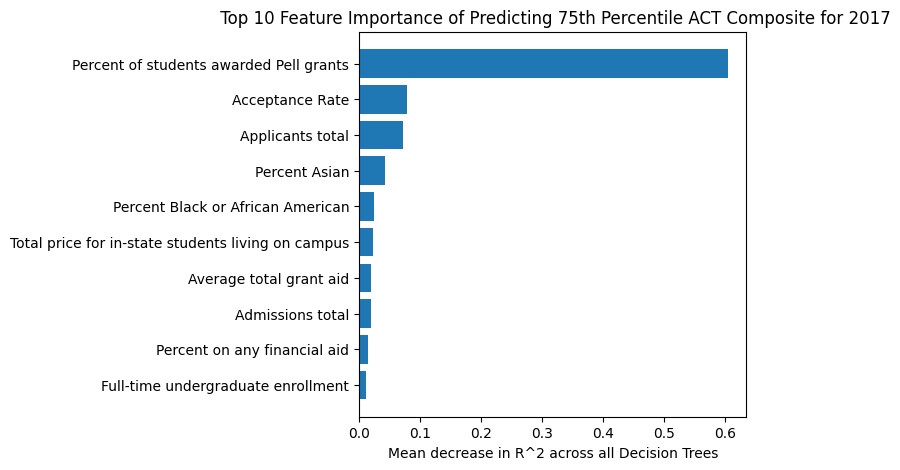

The r^2 of the 2018 model is: 0.7024980571265308


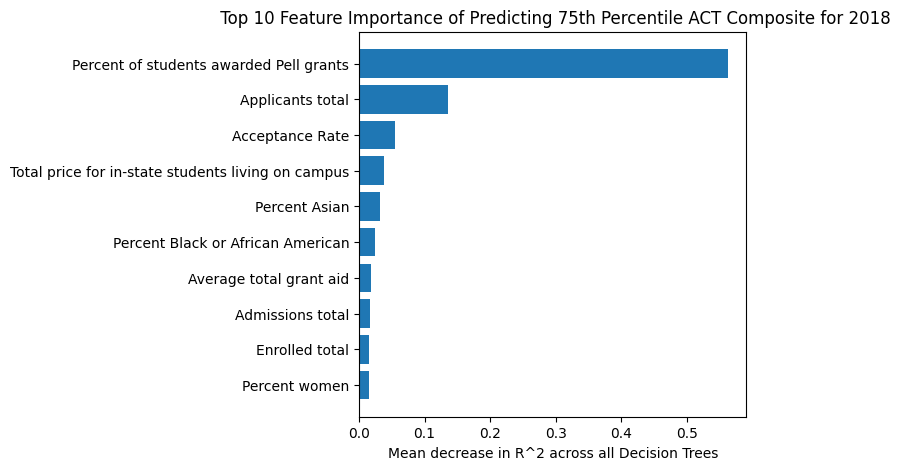

The r^2 of the 2019 model is: 0.7026952254132466


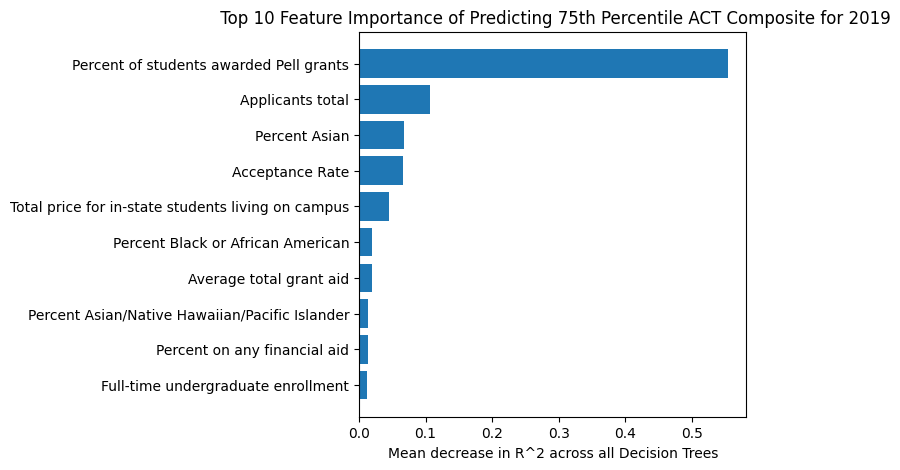

In [18]:
# for each year and dataframe perform a random forest regression and the r2 value
for year, df in zip(years, dfs):
    y, y_pred, rf_reg = df_rfreg(df, target_col = 'ACT Composite 75th percentile', col_start = 'Percent on any financial aid', 
                      col_end = 'Enrolled part time total')
    
    # get r^2 of model
    print(f'The r^2 of the {year} model is:', r2_score(y_true = y, y_pred = y_pred))
    
    
    # get the column names of the features
    x_feat_list = df.loc[:, 'Percent on any financial aid':'Enrolled part time total'].columns

    # plot the feature importances
    plot_feat_import(x_feat_list, rf_reg.feature_importances_, title = f' Top 10 Feature Importance of Predicting 75th Percentile ACT Composite for {year}', 
                     limit = 10)